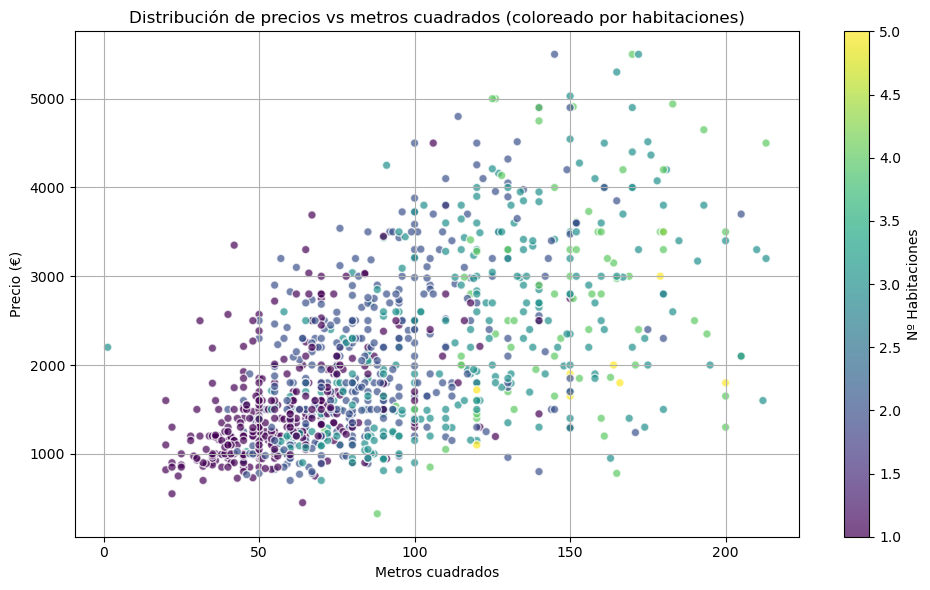

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Cargar el archivo CSV
file_path = "C:/Users/pablo/proyecto/comparador/alquiler_unificado_con_coordenadas_unicos.csv"
df = pd.read_csv(file_path)

# 2. Eliminar filas con valores nulos en columnas clave
df_clean = df.dropna(subset=['precio_num', 'habitaciones_num', 'baños_num', 'metros_num', 'lat', 'lon'])

# 3. Eliminar outliers usando el método del rango intercuartílico (IQR)
def remove_outliers_iqr(dataframe, columns):
    for col in columns:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        dataframe = dataframe[(dataframe[col] >= lower_bound) & (dataframe[col] <= upper_bound)]
    return dataframe

columns_to_clean = ['precio_num', 'habitaciones_num', 'baños_num', 'metros_num']
df_clean = remove_outliers_iqr(df_clean, columns_to_clean)

# 4. Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_clean["metros_num"],
    df_clean["precio_num"],
    c=df_clean["habitaciones_num"],
    cmap='viridis',
    alpha=0.7,
    edgecolors='w'
)
plt.colorbar(scatter, label='Nº Habitaciones')
plt.xlabel('Metros cuadrados')
plt.ylabel('Precio (€)')
plt.title('Distribución de precios vs metros cuadrados (coloreado por habitaciones)')
plt.grid(True)
plt.tight_layout()
plt.show()
